# Telco Churn Classification Project
By Michael P. Moran

## Table of contents
1. [Project Planning](#project-planning)
1. [Prepare Environment](#prepare-environment)
    1. [Sub paragraph](#subparagraph1)
1. [Acquisition](#acquisition)
1. [Preparation](#preparation)
1. [Exploration](#exploration)
1. [Modeling](#modeling)

## TODO
- SQL query
    - [ ] only include properties with a transaction in 2016 &/or 2017 (along with zestimate error and date of transaction).
    - [ ] only include properties that include a latitude and longitude value
- Removing lots
    - [ ] find a ratio between taxlandvalue and lotsizesquarefeet to exclude lots (there are some with 70k taxappraisalvalue and a lotsize of 30-40k square feet
    - [ ] fill taxdelinquencyflag with N for the NaNs. but what to do with taxdelinquencyyear? maybe combine the flag with the year to create a variable that reflects how long it has been delinquent and put a 0 for those that are not delinquent
    - [ ] combine calculatedsqft and lotsizesqft???
    - [ ] combine bedroomcnt and bathroomcnt?

## Project Planning <a name="project-planning"></a>

### Goals

### Deliverables

### Data Dictionary & Domain Knowledge

### Hypotheses

1. Low calculatedsqft is correlated with a higher logerror
1. Low lotsizesqft is correlated with a higher logerror
1. Low taxvaluedollarcnt is correlated with a higher logerror
1. Low bedroomcnt is correlated with a higher logerror
1. Low bathroomcnt is correlated with a higher logerror
1. bedroomcnt and bathroomcnt are positively correlated
1. calculatedsqft and taxvaluedollarcnt are positively correlated
    - Yes. There is a 0.6 correlation coefficient
1. lotsizesqft and taxvaluedollarcnt are positively correlated
    - No. Tax value actually goes down with bigger lots (are these lots without houses??)

### Thoughts & Questions

## Prepare Environment <a name="prepare-environment"></a>

In [14]:
import acquire_zillow
import prepare_zillow
import explore_zillow
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.width', 1000)

**Reload modules to capture changes**

In [20]:
acquire_zillow = reload(acquire_zillow)
prepare_zillow = reload(prepare_zillow)
explore_zillow = reload(explore_zillow)

## Acquisition <a name="acquisition"></a>

In [3]:
df = acquire_zillow.get_zillow_from_csv("zillow_data.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Preparation <a name="preparation"></a>

### Summarize Data

In [4]:
prepare_zillow.summarize(df)

HEAD
   Unnamed: 0  parcelid         basementsqft          bathroomcnt  \
0           0  11016594                  nan                 2.00   
1           1  14366692                  nan                 3.50   
2           2  12098116                  nan                 3.00   
3           3  12643413                  nan                 2.00   
4           4  14432541                  nan                 2.50   

            bedroomcnt  buildingqualitytypeid    calculatedbathnbr  \
0                 3.00                   4.00                 2.00   
1                 4.00                    nan                 3.50   
2                 2.00                   4.00                 3.00   
3                 2.00                   4.00                 2.00   
4                 4.00                    nan                 2.50   

            decktypeid  finishedfloor1squarefeet  \
0                  nan                       nan   
1                  nan                       nan   
2  

DESCRIPTION
                Unnamed: 0             parcelid         basementsqft  \
count           167,888.00           167,888.00                93.00   
mean             42,210.24        12,995,358.54               695.38   
std              24,641.50         3,016,071.40               583.95   
min                   0.00        10,711,738.00                38.00   
25%              20,985.75        11,548,985.75               280.00   
50%              41,971.50        12,540,601.00               588.00   
75%              62,957.25        14,219,303.00               819.00   
max              90,274.00       167,689,317.00             3,560.00   

               bathroomcnt           bedroomcnt  buildingqualitytypeid  \
count           167,854.00           167,854.00             107,173.00   
mean                  2.29                 3.04                   6.02   
std                   1.00                 1.15                   1.88   
min                   0.00                 

Unnamed: 0:
(-90.275, 9027.4]     18056
(9027.4, 18054.8]     18054
(18054.8, 27082.2]    18056
(27082.2, 36109.6]    18054
(36109.6, 45137.0]    18056
(45137.0, 54164.4]    18054
(54164.4, 63191.8]    18054
(63191.8, 72219.2]    18056
(72219.2, 81246.6]    14420
(81246.6, 90274.0]     9028
Name: Unnamed: 0, dtype: int64


parcelid:
(10554760.42, 26409495.9]     167841
(26409495.9, 42107253.8]           0
(42107253.8, 57805011.7]           0
(57805011.7, 73502769.6]           0
(73502769.6, 89200527.5]           1
(89200527.5, 104898285.4]          4
(104898285.4, 120596043.3]         0
(120596043.3, 136293801.2]         0
(136293801.2, 151991559.1]         0
(151991559.1, 167689317.0]        42
Name: parcelid, dtype: int64


basementsqft:
(34.477000000000004, 390.2]    31
(390.2, 742.4]                 32
(742.4, 1094.6]                14
(1094.6, 1446.8]                7
(1446.8, 1799.0]                5
(1799.0, 2151.2]                2
(2151.2, 2503.4]                0
(2503.4, 285

(7.819, 329.0]      3382
(329.0, 647.0]      1334
(647.0, 965.0]       226
(965.0, 1283.0]       66
(1283.0, 1601.0]      16
(1601.0, 1919.0]       6
(1919.0, 2237.0]       2
(2237.0, 2555.0]       2
(2555.0, 2873.0]       3
(2873.0, 3191.0]       2
Name: yardbuildingsqft17, dtype: int64


yardbuildingsqft26:
(10.645000000000001, 147.4]    79
(147.4, 282.8]                 35
(282.8, 418.2]                 19
(418.2, 553.6]                 11
(553.6, 689.0]                  6
(689.0, 824.4]                  1
(824.4, 959.8]                  4
(959.8, 1095.2]                 3
(1095.2, 1230.6]                5
(1230.6, 1366.0]                2
Name: yardbuildingsqft26, dtype: int64


yearbuilt:
(1823.807, 1843.2]        1
(1843.2, 1862.4]          0
(1862.4, 1881.6]          3
(1881.6, 1900.8]        183
(1900.8, 1920.0]       3772
(1920.0, 1939.2]      14536
(1939.2, 1958.4]      40250
(1958.4, 1977.6]      43705
(1977.6, 1996.8]      41424
(1996.8, 2016.0]      22954
Name: yearbuilt, 

1. **Remove non-single unit properties**
1. **Convert type of certain columns from numeric to category**

In [5]:
df = prepare_zillow.prepare_zillow(df)

### Handle Missing Values

Run the first function that returns missing value totals by column: Does the attribute have enough information (i.e. enough non-null values) to be useful? Choose your cutoff and remove columns where there is not enough information available. Document your cutoff and your reasoning.

**Drop certain columsn**

- Same information
    - finishedsquarefeet12 because it has the same information as calculatedfinishedsquarefeet except for 9 rows.
    - structuretaxvaluedollarcnt because it has the same info as taxvaluedollarcnt
    - UNSURE: landtaxvaluedollarcnt because it has the same info as taxvaluedollarcnt (but I imputed this column with the linear model)
- 100% or near 100% missing values
    - basementsqft
    - decktypeid
    - finishedfloor1squarefeet
    - finishedsquarefeet13
	- finishedsquarefeet15
    - finishedsquarefeet50
    - finishedsquarefeet6
	- fireplacecnt
    - garagecarcnt
    - garagetotalsqft
    - hashottuborspa
	- poolsizesum
    - pooltypeid10
    - pooltypeid2
    - threequarterbathnbr
	- yardbuildingsqft17
    - yardbuildingsqft26
    - numberofstories
    - fireplaceflag
    - architecturalstyledesc
    - buildingclassdesc
	- storydesc
    - typeconstructiondesc
- too difficult to impute
    - regionidneighborhood (almost 50% missing; not sure how to impute this)
    

**Impute 0 for certain columns**

**Impute values for certain columns**
- most frequent value
    - buildingqualitytypeid (7)
    - propertyzoningdes (LAR1)
    - regionidcity (12447)
    - regionidzip (?)
    - yearbuilt (1950)
- median
    - structuretaxvaluedollarcnt (131815.00)

**Drop certain rows**
- those with nan in landtaxvaluedollarcnt

In [6]:
prepare_zillow.df_missing_vals_by_col(df)

,nmissing,percentage,nempty
Unnamed: 0,0,0.00,0
parcelid,0,0.00,0
bathroomcnt,0,0.00,0
bedroomcnt,0,0.00,0
buildingqualitytypeid,0,0.00,0
calculatedbathnbr,0,0.00,0
calculatedfinishedsquarefeet,0,0.00,0
fips,0,0.00,0
fullbathcnt,0,0.00,0
latitude,0,0.00,0


In [7]:
df = df.dropna(subset=["taxamount", "censustractandblock", "heatingorsystemdesc"])

In [9]:
df = df.drop(columns=["taxdelinquencyflag", "taxdelinquencyyear", "airconditioningdesc"])

### Handle Duplicates

### Fix Data Types

### Handle Outliers

### Add columns

**add column with abs of logerror**

In [10]:
df["logerror_abs"] = df.logerror.abs()

## Exploration  <a name="exploration"></a>

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Create sample of df for exploration**

In [27]:
df_sample = df.sample(n=25_000, random_state=123)

**Bin logerror**

In [46]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)], closed="both")
df["logerror_bin"] = pd.cut(df.logerror_abs, bins=bins)
bins[0]

Interval(0, 1, closed='both')

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fr

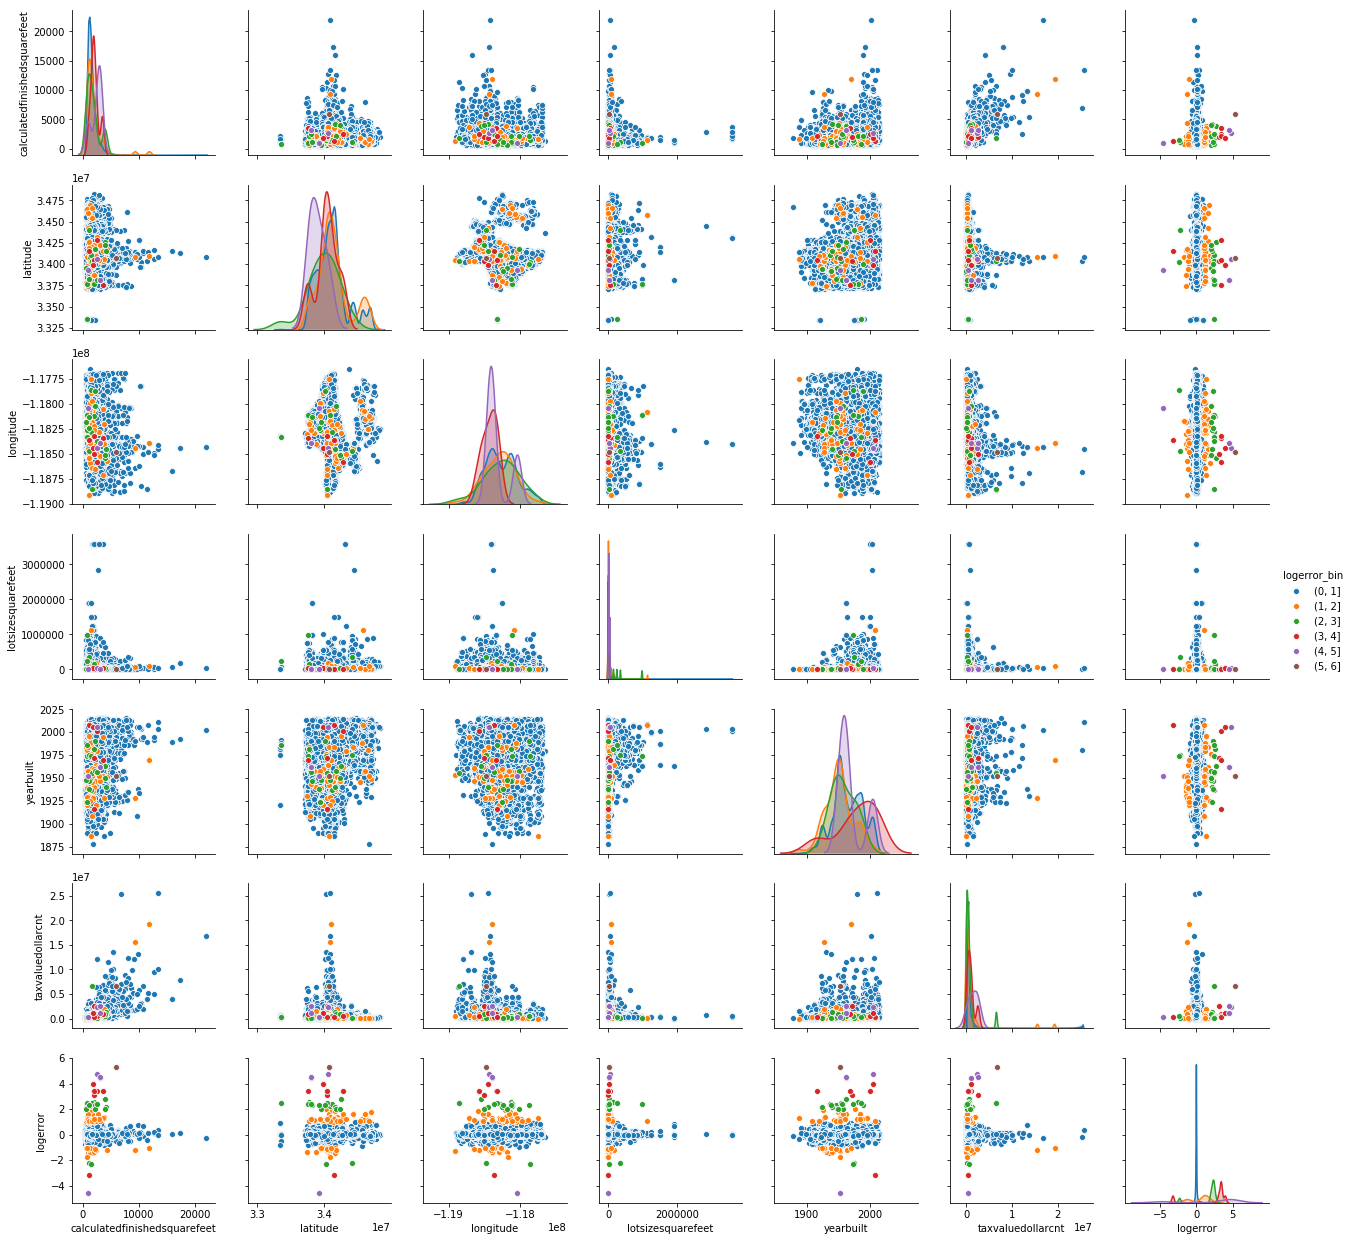

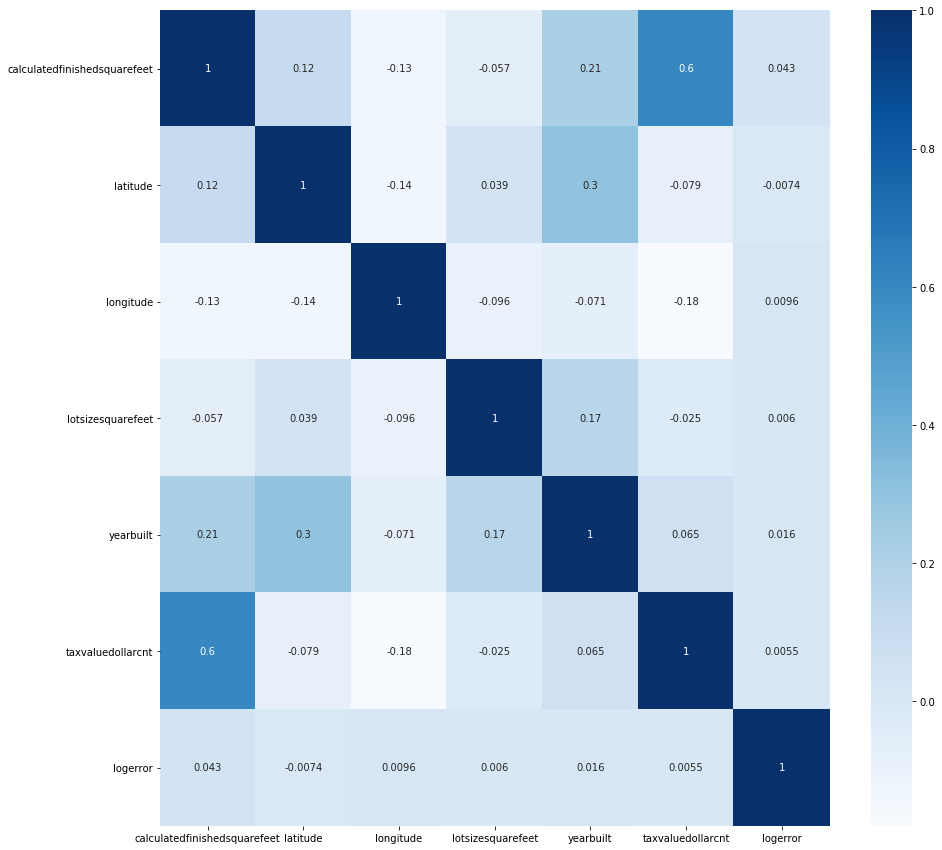

In [38]:
continuous_cols = ["calculatedfinishedsquarefeet",
                "latitude", "longitude", "lotsizesquarefeet",
                "yearbuilt", "taxvaluedollarcnt", "logerror"]

contin_and_cat_cols = ["bathroomcnt", "bedroomcnt", "fips", "poolcnt", ]

explore_zillow.df_plot_numeric(df_sample, continuous_cols, "logerror_bin")

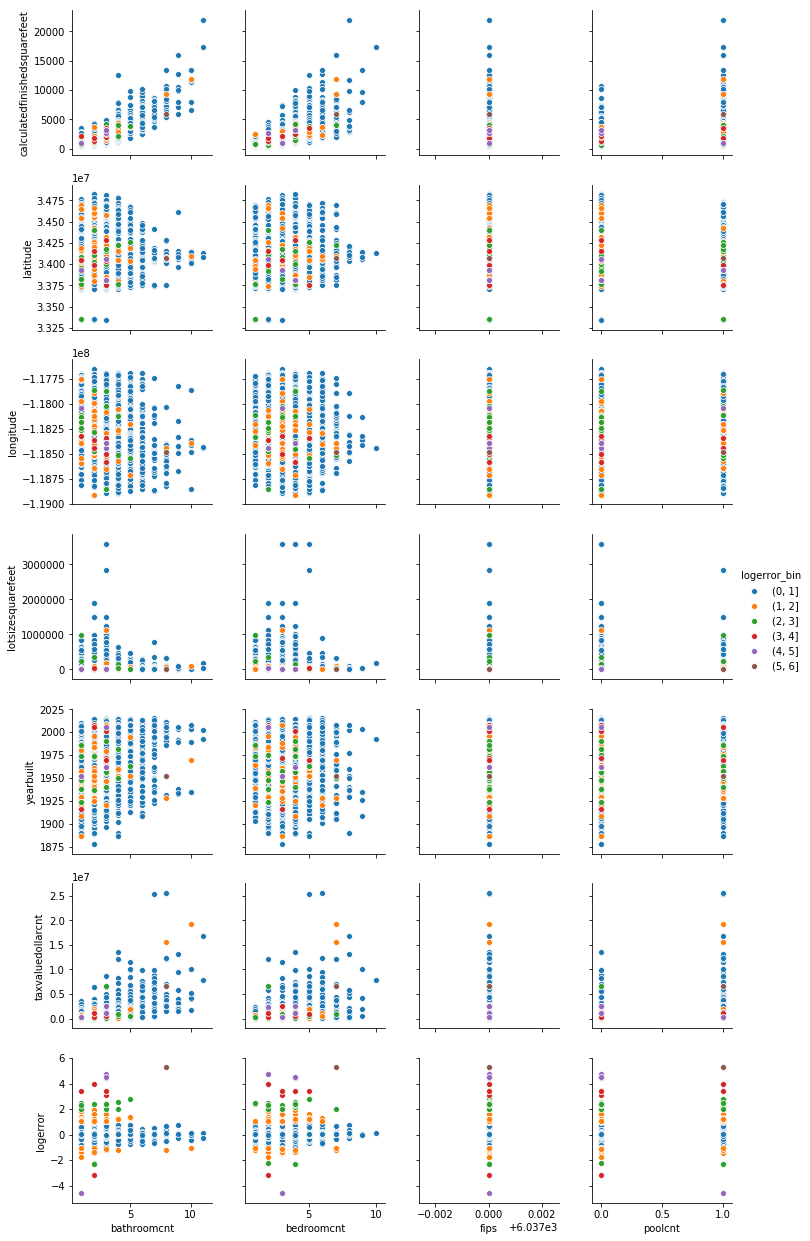

In [39]:
explore_zillow.df_jitter_plot(df_sample, contin_and_cat_cols, continuous_cols, "logerror_bin")

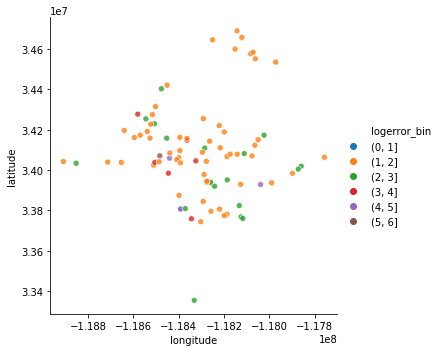

In [47]:
def relplot_num_and_cat(df: pd.DataFrame, x: str, y: str, hue: str) -> pd.DataFrame:
    """
    Write a function that will use seaborn's relplot to plot 2 numeric (ordered) variables
    and 1 categorical variable. It will take, as input, a dataframe, column name indicated
    for each of the following: x, y, & hue.
    """
    sns.relplot(x=x, y=y, hue=hue, data=df, alpha=0.8)
    plt.show

relplot_num_and_cat(df_sample[df_sample.logerror_bin != bins[0]] , "longitude", "latitude", "logerror_bin")

In [48]:
def swarmplot_num_and_cat(df: pd.DataFrame, X: str, Y: list, hue: str=None) -> None:
    """
    Write a function that will take, as input, a dataframe, a categorical column name,
    and a list of numeric column names. It will return a series of subplots: a swarmplot
    for each numeric column. X will be the categorical variable.
    """
    sns.swarmplot(x=X, y=Y, data=df, hue=hue, palette="Set2")
    plt.plot

swarmplot_num_and_cat(df, "logerror_bin", [""])

### Train-Test Split

### JointPlot

### PairGrid

### Heatmap

### T-Tests

### Run at least one t-test and chi2 test

### Summarize Conclusions

- From PairPlot
    - logerror v. others
        - logerror is worse for homes with a relatively small calculatedsqft and lotsizesqft
        - logerror is worse in the middle of the latitude and longitude values
        - logerror is worse for homes with a relatively low taxvaluedollarcnt, landtaxvaluedollarcnt, and structuretaxvaluedollarcnt
        - worse for homes with fewer bedrooms and bathrooms
    - taxvaluedollarcnt
        - all the variables like this one (landtaxvaluedollarcnt, structuretaxvaluedollarcnt) have similar scatterplots when compared to other variables. They appear to be giving the same information.
    - calculatedfinishedsqft
        - slight correlation with yearbuilt
        - slight correlation with taxvaluedollarcnt (0.6 Pearson R - see HeatMap)
    - bathroomcnt
        - positive correlation between calculatedfinishedsquarefeet
    - bedroomcnt
        - positive correlation between calculatedfinishedsquarefeet
    - latitude
        - houses near the middle of the latitude range have a higher square footage and taxvalue
    - lotsizesquareft
        - as square footage increases, taxvalue appears to decrease (a litle odd?)
        - bedroomcnt and bathroomcnt appear to decrease as well
- From RelPlot
    - Houses with a logerror > 1 appear to form clusters based on longitude and latitude
    

## Modeling <a name="modeling"></a>

### Feature Engineering & Selection

### Train & Test Model

### Summarize Conclusions